 
Fit quality:
chisq per point = 
 [0.128 0.533 0.387 0.724 1.507 0.016 2.579 1.072 0.156 0.062 2.159 0.006]
chisq =  9.33, chisq/NDF =  0.93.
 
Parameters returned by fit:
Intercept = -2.51 +-  1.63
Gradient = 10.48 +-  0.28
 


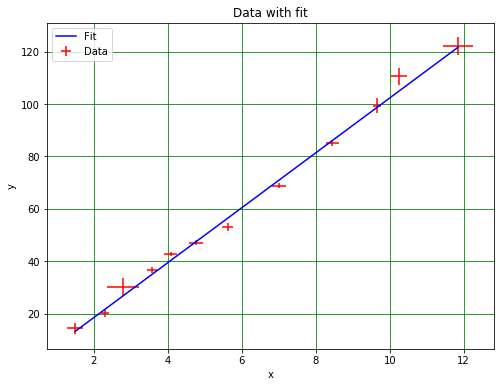

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#
# least_squares is a fitting routine
from scipy.optimize import least_squares# <!-- Demo -->
#
# nPoints is the number of data points in the fit
nPoints = 12
#
# Define arrays to store the x and y data values
xData, yData = np.zeros(nPoints), np.zeros(nPoints)
#
# Define arrays to store the errors in x and y
xError, yError = np.zeros(nPoints), np.zeros(nPoints)
#
# Enter the x data points
xData[0] = 1.50
xData[1] = 2.31
xData[2] = 2.78
xData[3] = 3.58
xData[4] = 4.08
xData[5] = 4.76
xData[6] = 5.62
xData[7] = 7.02
xData[8] = 8.45
xData[9] = 9.65
xData[10] = 10.25
xData[11] = 11.85
#
# Enter the y data points
yData[0] = 14.3
yData[1] = 20.2
yData[2] = 30.1
yData[3] = 36.5
yData[4] = 42.7
yData[5] = 47.1
yData[6] = 52.9
yData[7] = 68.8
yData[8] = 85.2
yData[9] = 99.4
yData[10] = 110.5
yData[11] = 122.1
#
# Enter the errors in the x values
xError[0] = 0.21
xError[1] = 0.11
xError[2] = 0.43
xError[3] = 0.13
xError[4] = 0.17
xError[5] = 0.18
xError[6] = 0.15
xError[7] = 0.19
xError[8] = 0.17
xError[9] = 0.11
xError[10] = 0.21
xError[11] = 0.41
#
# Enter the errors in the x and y values
yError[0] = 2.1
yError[1] = 1.7
yError[2] = 3.3
yError[3] = 1.1
yError[4] = 0.9
yError[5] = 1.1
yError[6] = 1.5
yError[7] = 0.9
yError[8] = 1.2
yError[9] = 2.9
yError[10] = 3.1
yError[11] = 3.3
#

# <!-- Demo -->
#
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitChi(p, x, y, xerr, yerr):
    '''
    Chi function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
# Set initial values of fit parameters, run fit
pInit = [1.0, 1.0]
out = least_squares(fitChi, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chisqArr = fitChi(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chisqArr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chisqArr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Calculate fitted function values
    fitData = fitLine(pFinal, xData)
    #
    # Compute covariance
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.2f}".format(cVal))
        print("Gradient = {:5.2f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.2f} +- {:5.2f}".format(cVal, cErr))
        print("Gradient = {:5.2f} +- {:5.2f}".format(mVal, mErr))
        print(" ")
    #
    # Plot data
    fig = plt.figure(figsize = (8, 6))
    plt.title('Data with fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, fmt='r', \
                 linestyle = '', label = "Data") 
    plt.plot(xData, fitData, color = 'b', linestyle = '-', label = "Fit")
    plt.grid(color = 'g')
    plt.legend(loc = 2)
    plt.show()